## Скачиваем датасет

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")

print("Path to dataset files:", path)

d:\projects\uni\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 15.8k/15.8k [00:00<00:00, 1.18MB/s]

Extracting files...
Path to dataset files: C:\Users\C2H5OH\.cache\kagglehub\datasets\ahmeduzaki\global-earthquake-tsunami-risk-assessment-dataset\versions\1


## Перекладываем его в папку с проектом

In [ ]:
import shutil
import os

csv_source = os.path.join(path, "earthquake_data_tsunami.csv")

project_dir = os.path.dirname(os.path.abspath("."))
csv_destination = os.path.join(project_dir, "earthquake_data_tsunami.csv")

shutil.copy2(csv_source, csv_destination)

print(f"CSV файл скопирован в: {csv_destination}")
print(f"Файл существует: {os.path.exists(csv_destination)}")


CSV файл скопирован в: d:\projects\uni\machine learning\earthquake_data_tsunami.csv
Файл существует: True


## Описание датасета

**Датасет:** Global Earthquake Tsunami Risk Assessment Dataset (Kaggle)

**Предметная область:** Геофизика, сейсмология, оценка природных рисков

**Источник данных:** Глобальные сейсмические сети мониторинга, данные о землетрясениях

**Характер данных:** Реальные данные о землетрясениях за 2022 год

**Задача анализа:** 
- Классификация: предсказание возникновения цунами на основе характеристик землетрясения
- Кластеризация: группировка землетрясений по схожим характеристикам
- Регрессия: прогнозирование магнитуды или интенсивности землетрясений

**Используемые атрибуты:**
- magnitude: Магнитуда землетрясения по шкале Рихтера - числовой
- cdi: Индекс интенсивности сотрясений (CDI) - числовой
- mmi: Модифицированная шкала интенсивности Меркалли - числовой
- sig: Значимость землетрясения - числовой
- nst: Количество сейсмических станций, зафиксировавших событие - числовой
- dmin: Минимальное расстояние до ближайшей станции (км) - числовой
- gap: Наибольший разрыв в азимутальном покрытии станций (градусы) - числовой
- depth: Глубина гипоцентра землетрясения (км) - числовой
- latitude: Широта эпицентра - числовой
- longitude: Долгота эпицентра - числовой
- Year: Год события - числовой
- Month: Месяц события - числовой
- tsunami: Наличие цунами (1 - да, 0 - нет) - категориальный (целевая переменная)


In [12]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('earthquake_data_tsunami.csv')


In [13]:
#предпросмотр
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
df.head()


Размер данных: (782, 13)

Первые 5 строк:


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


## Анализ атрибутов датасета

Для каждого атрибута определим:
- Среднее значение и стандартное отклонение
- Гистограмму распределения значений
- Наличие выбросов
- Пропущенные значения и способы их обработки


## Вычислим средние значения и СКО:

In [44]:
from tabulate import tabulate

# основные числ. атрибуты для анализа
numerical_features = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'tsunami']
df_numerical = df[numerical_features]

# Создаем данные для таблицы
table_data = []
for col in numerical_features:
    mean_val = df_numerical[col].mean()
    std_val = df_numerical[col].std()
    rel_var = (std_val/mean_val*100)
    table_data.append([col, f"{mean_val:.2f}", f"{std_val:.2f}", f"{rel_var:.1f}%"])

# Выводим красивую таблицу
headers = ["Атрибут", "Среднее", "СКО", "Отн. вар."]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+-----------+-----------+--------+-------------+
| Атрибут   |   Среднее |    СКО | Отн. вар.   |
+===========+===========+========+=============+
| magnitude |      6.94 |   0.45 | 6.4%        |
+-----------+-----------+--------+-------------+
| cdi       |      4.33 |   3.17 | 73.1%       |
+-----------+-----------+--------+-------------+
| mmi       |      5.96 |   1.46 | 24.5%       |
+-----------+-----------+--------+-------------+
| sig       |    870.11 | 322.47 | 37.1%       |
+-----------+-----------+--------+-------------+
| nst       |    230.25 | 250.19 | 108.7%      |
+-----------+-----------+--------+-------------+
| dmin      |      1.33 |   2.22 | 167.4%      |
+-----------+-----------+--------+-------------+
| gap       |     25.04 |  24.23 | 96.7%       |
+-----------+-----------+--------+-------------+
| depth     |     75.88 | 137.28 | 180.9%      |
+-----------+-----------+--------+-------------+
| latitude  |      3.54 |  27.3  | 771.7%      |
+-----------+-------

## Построим гистограммы

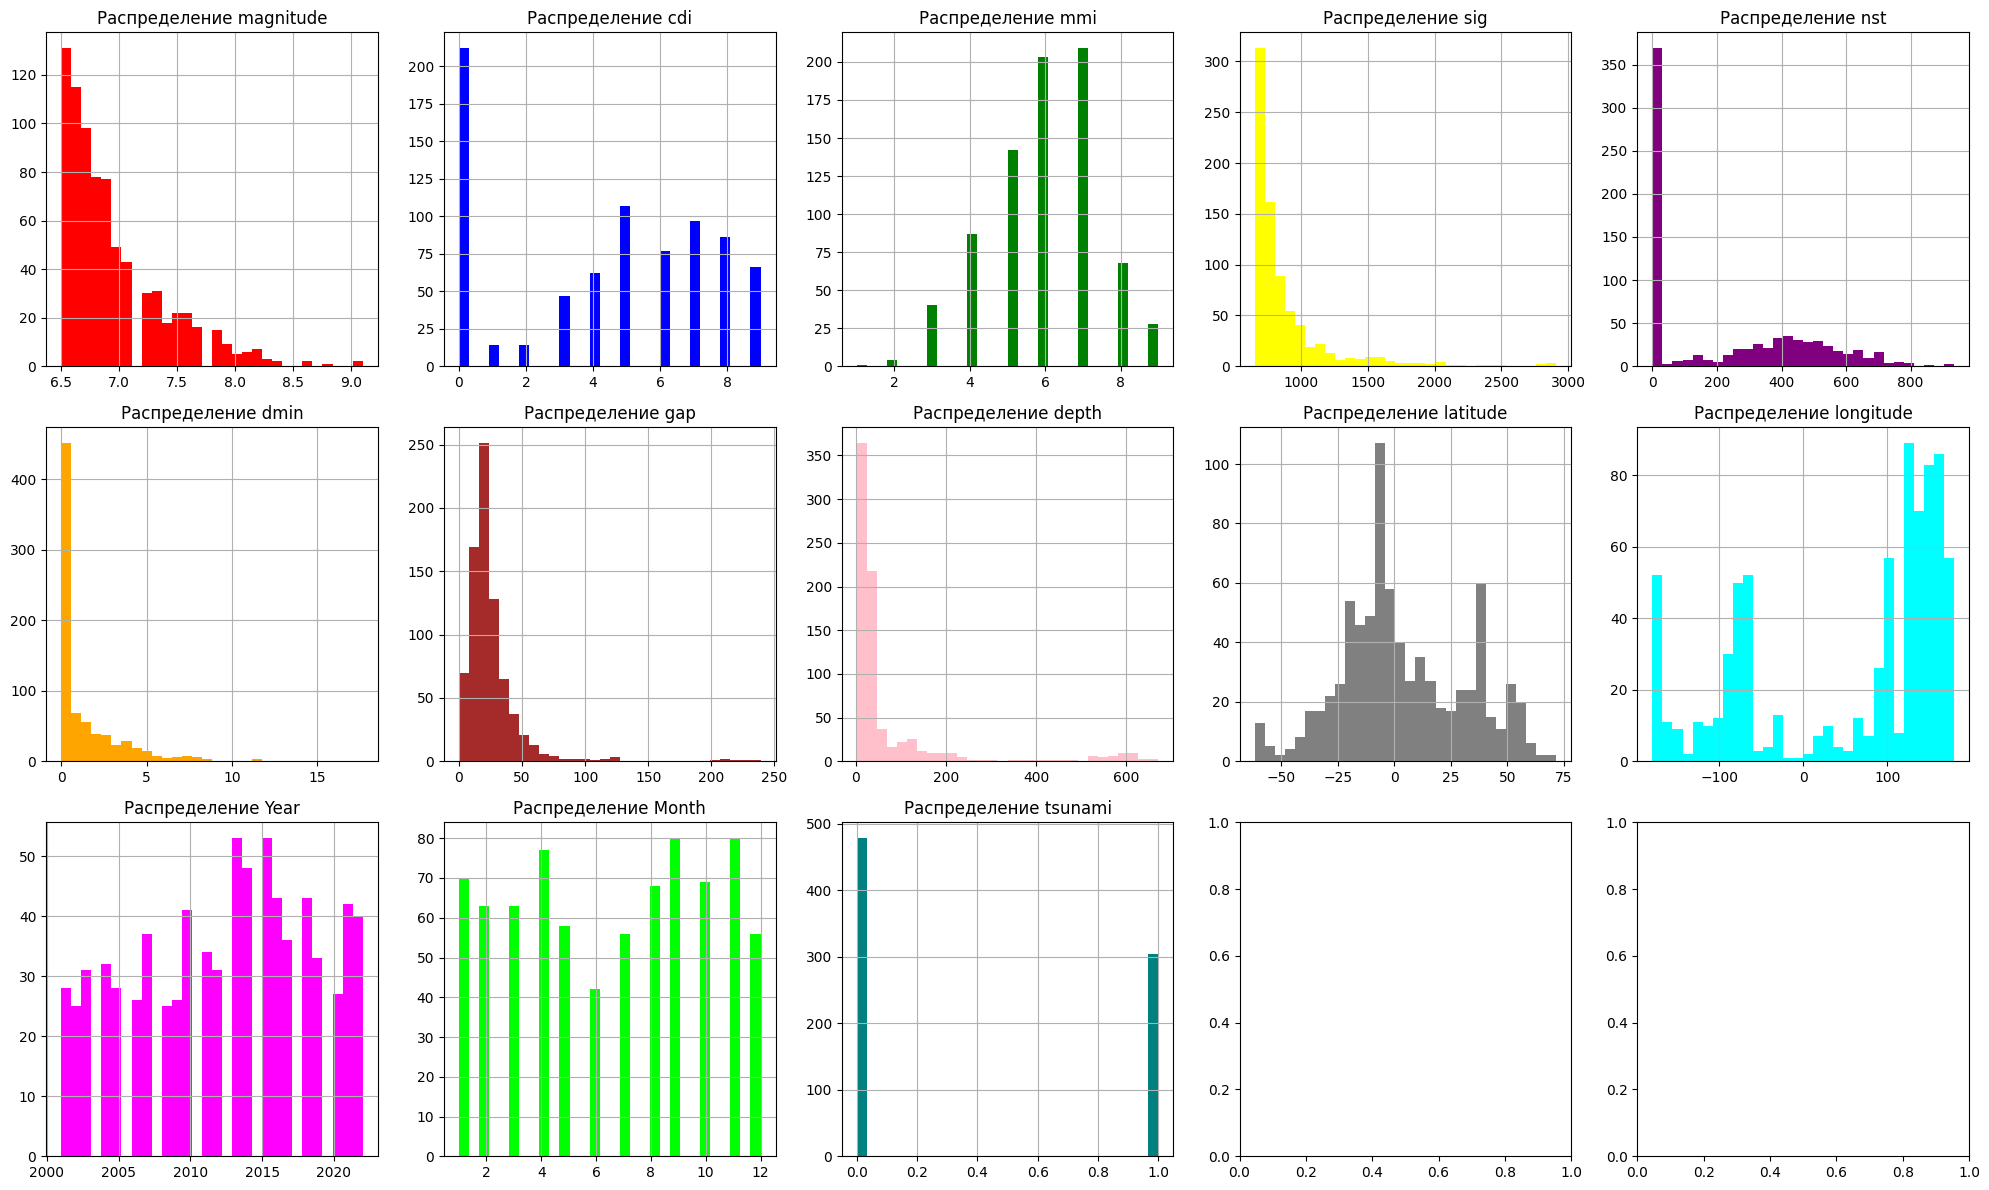

In [45]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'lime', 'teal', 'navy', 'maroon', 'olive']
for i, col in enumerate(numerical_features):
    ax = axes[i//5, i%5]
    df_numerical[col].hist(bins=30, ax=ax, color=colors[i%len(colors)])
    ax.set_title(f'Распределение {col}')
plt.tight_layout()
plt.show()


## Выполним детальный анализ пропущенных значений

In [47]:
analysis_data = []
for col in numerical_features:
    missing_count = df_numerical[col].isnull().sum()
    missing_percent = (missing_count / len(df_numerical)) * 100
    
    if missing_count > 0:
        median_val = df_numerical[col].median()
        recommendation = f"Заполнить медианой ({median_val:.2f})"
    else:
        recommendation = "Пропусков нет"
    
    analysis_data.append([
        col, 
        missing_count, 
        f"{missing_percent:.2f}%", 
        recommendation
    ])

# Выводим объединенную таблицу
headers = ["Атрибут", "Пропуски", "Процент", "Рекомендация"]
print(tabulate(analysis_data, headers=headers, tablefmt="grid"))


+-----------+------------+-----------+----------------+
| Атрибут   |   Пропуски | Процент   | Рекомендация   |
+===========+============+===========+================+
| magnitude |          0 | 0.00%     | Пропусков нет  |
+-----------+------------+-----------+----------------+
| cdi       |          0 | 0.00%     | Пропусков нет  |
+-----------+------------+-----------+----------------+
| mmi       |          0 | 0.00%     | Пропусков нет  |
+-----------+------------+-----------+----------------+
| sig       |          0 | 0.00%     | Пропусков нет  |
+-----------+------------+-----------+----------------+
| nst       |          0 | 0.00%     | Пропусков нет  |
+-----------+------------+-----------+----------------+
| dmin      |          0 | 0.00%     | Пропусков нет  |
+-----------+------------+-----------+----------------+
| gap       |          0 | 0.00%     | Пропусков нет  |
+-----------+------------+-----------+----------------+
| depth     |          0 | 0.00%     | Пропусков

## Выполним анализ выбросов (IQR метод)

АНАЛИЗ ВЫБРОСОВ (IQR МЕТОД)
+-----------+-----------------------+-----------+-----------+
| Атрибут   |   Количество выбросов | Процент   | Уровень   |
+===========+=======================+===========+===========+
| magnitude |                    37 | 4.7%      | МАЛО      |
+-----------+-----------------------+-----------+-----------+
| cdi       |                     0 | 0.0%      | НЕТ       |
+-----------+-----------------------+-----------+-----------+
| mmi       |                     1 | 0.1%      | МАЛО      |
+-----------+-----------------------+-----------+-----------+
| sig       |                    73 | 9.3%      | УМЕРЕННО  |
+-----------+-----------------------+-----------+-----------+
| nst       |                     0 | 0.0%      | НЕТ       |
+-----------+-----------------------+-----------+-----------+
| dmin      |                    61 | 7.8%      | УМЕРЕННО  |
+-----------+-----------------------+-----------+-----------+
| gap       |                    48 | 6.1%

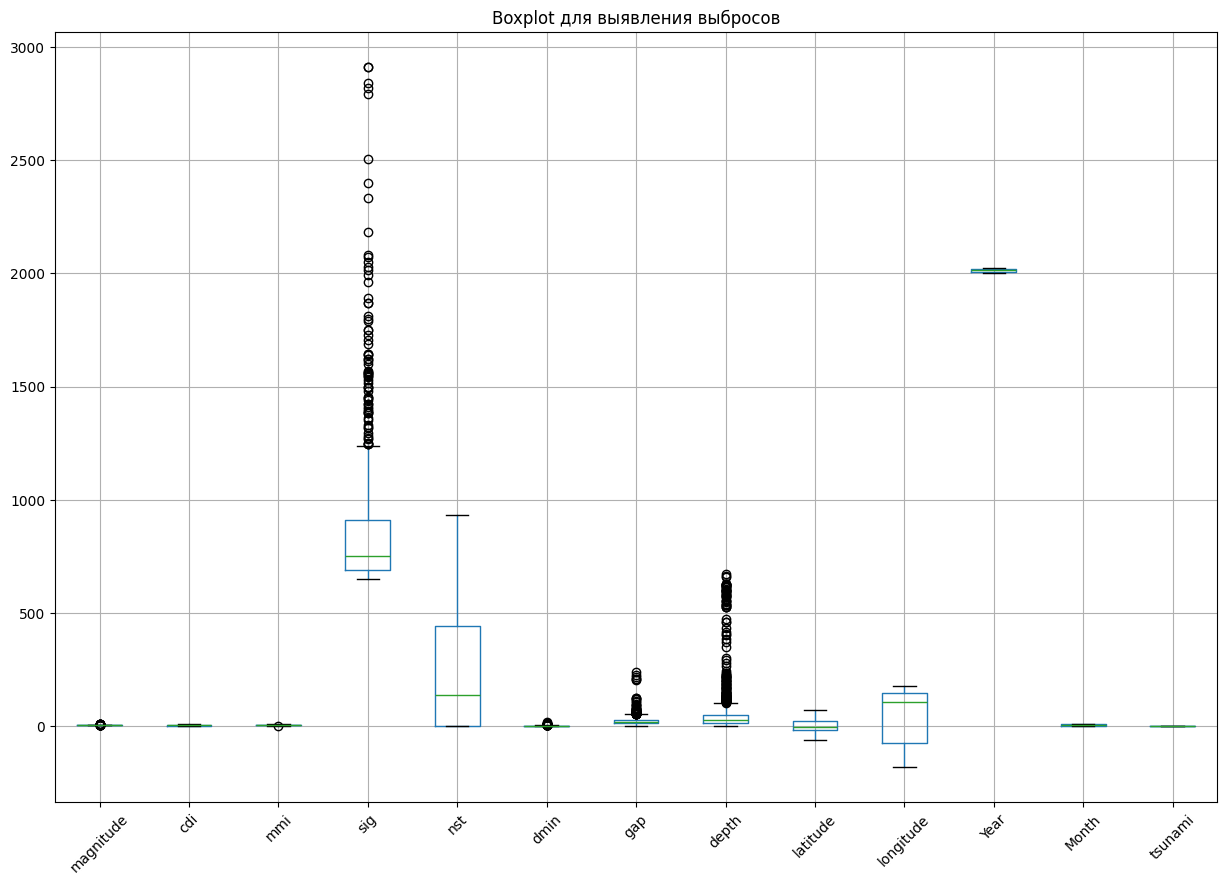

In [50]:
from tabulate import tabulate

# Поиск выбросов через IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

print("АНАЛИЗ ВЫБРОСОВ (IQR МЕТОД)")
print("=" * 50)

# Создаем данные для таблицы
outliers_data = []
total_outliers = 0

for col in numerical_features:
    outliers = find_outliers_iqr(df_numerical[col])
    outliers_count = outliers.sum()
    outliers_percent = (outliers_count / len(df_numerical)) * 100
    total_outliers += outliers_count
    
    # Определяем уровень выбросов
    if outliers_percent > 10:
        level = "МНОГО"
    elif outliers_percent > 5:
        level = "УМЕРЕННО"
    elif outliers_count > 0:
        level = "МАЛО"
    else:
        level = "НЕТ"
    
    outliers_data.append([
        col, 
        outliers_count, 
        f"{outliers_percent:.1f}%", 
        level
    ])

# Выводим таблицу выбросов
headers = ["Атрибут", "Количество выбросов", "Процент", "Уровень"]
print(tabulate(outliers_data, headers=headers, tablefmt="grid"))

# Общая статистика
print(f"\nОБЩАЯ СТАТИСТИКА:")
print(f"Всего выбросов: {total_outliers}")
print(f"Средний процент выбросов: {(total_outliers / (len(df_numerical) * len(numerical_features))) * 100:.1f}%")

# Box plot для визуализации
plt.figure(figsize=(15, 10))
df_numerical.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot для выявления выбросов")
plt.show()

## Анализ корреляций между параметрами


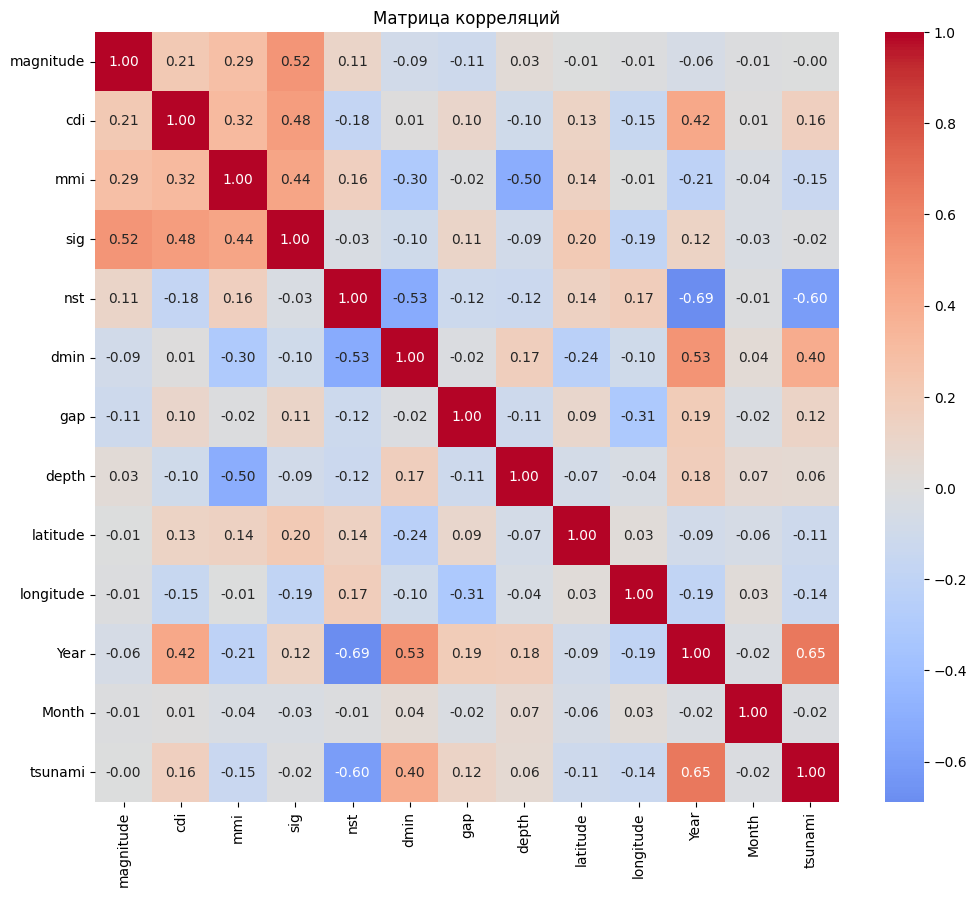

АНАЛИЗ КОРРЕЛЯЦИЙ МЕЖДУ ПАРАМЕТРАМИ

ВЫСОКОКОРРЕЛИРОВАННЫЕ АТРИБУТЫ (|r| > 0.6):
+-------------+-------------+--------------+-----------------------+
| Атрибут 1   | Атрибут 2   |   Корреляция | Тип связи             |
+=============+=============+==============+=======================+
| nst         | Year        |       -0.689 | Сильная отрицательная |
+-------------+-------------+--------------+-----------------------+
| nst         | tsunami     |       -0.6   | Сильная отрицательная |
+-------------+-------------+--------------+-----------------------+
| Year        | tsunami     |        0.647 | Сильная               |
+-------------+-------------+--------------+-----------------------+

НИЗКОКОРРЕЛИРОВАННЫЕ АТРИБУТЫ (|r| < 0.3): 65 пар
Примеры первых 10 пар:
+-------------+-------------+--------------+----------------------+
| Атрибут 1   | Атрибут 2   |   Корреляция | Тип связи            |
+=============+=============+==============+======================+
| magnitude   | cdi 

In [51]:
# # Матрица корреляций
# plt.figure(figsize=(12, 10))
# corr_matrix = df_numerical.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
# plt.title("Матрица корреляций")
# plt.show()

# # Анализ высоких корреляций
# high_corr = corr_matrix[(corr_matrix > 0.6) & (corr_matrix < 1.0)]
# print("Высококоррелированные атрибуты:")
# print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

# # Низкие корреляции
# low_corr = corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3) & (corr_matrix != 0)]
# print("\nНизкокоррелированные атрибуты:")
# print(low_corr.dropna(how='all').dropna(axis=1, how='all'))


from tabulate import tabulate

# Матрица корреляций
plt.figure(figsize=(12, 10))
corr_matrix = df_numerical.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Матрица корреляций")
plt.show()

print("АНАЛИЗ КОРРЕЛЯЦИЙ МЕЖДУ ПАРАМЕТРАМИ")
print("=" * 60)

# Анализ высоких корреляций
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.6:
            high_corr_pairs.append([
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                f"{corr_val:.3f}",
                "Сильная" if corr_val > 0 else "Сильная отрицательная"
            ])

if high_corr_pairs:
    print("\nВЫСОКОКОРРЕЛИРОВАННЫЕ АТРИБУТЫ (|r| > 0.6):")
    headers = ["Атрибут 1", "Атрибут 2", "Корреляция", "Тип связи"]
    print(tabulate(high_corr_pairs, headers=headers, tablefmt="grid"))
else:
    print("\nВЫСОКОКОРРЕЛИРОВАННЫХ АТРИБУТОВ НЕ НАЙДЕНО")

# Анализ низких корреляций
low_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) < 0.3:
            low_corr_pairs.append([
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                f"{corr_val:.3f}",
                "Слабая" if corr_val > 0 else "Слабая отрицательная"
            ])

print(f"\nНИЗКОКОРРЕЛИРОВАННЫЕ АТРИБУТЫ (|r| < 0.3): {len(low_corr_pairs)} пар")
print("Примеры первых 10 пар:")
headers = ["Атрибут 1", "Атрибут 2", "Корреляция", "Тип связи"]
print(tabulate(low_corr_pairs[:10], headers=headers, tablefmt="grid"))

# Общая статистика
total_pairs = len(corr_matrix.columns) * (len(corr_matrix.columns) - 1) // 2
print(f"\nОБЩАЯ СТАТИСТИКА:")
print(f"Всего пар атрибутов: {total_pairs}")
print(f"Высококоррелированных пар: {len(high_corr_pairs)}")
print(f"Низкокоррелированных пар: {len(low_corr_pairs)}")
print(f"Умеренно коррелированных пар: {total_pairs - len(high_corr_pairs) - len(low_corr_pairs)}")

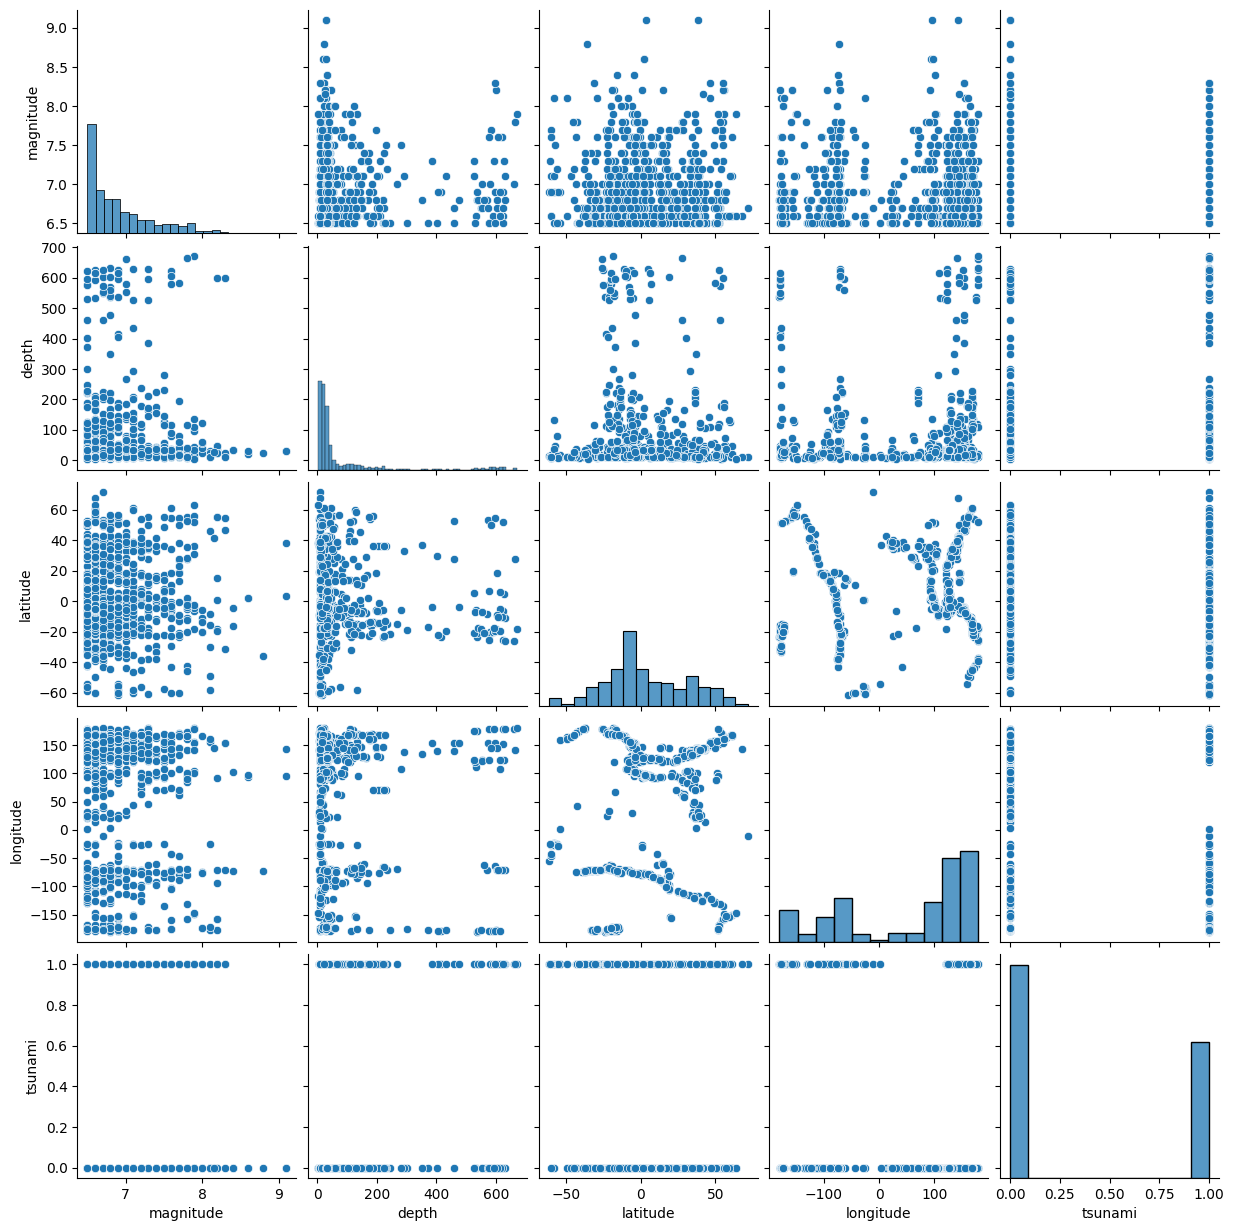

In [29]:
# Матрица scatter plots для основных атрибутов
sns.pairplot(df_numerical[['magnitude', 'depth', 'latitude', 'longitude', 'tsunami']])
plt.show()


## Выполним детальный анализ корреляций

In [52]:
# Находим пары с высокой корреляцией
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.6:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print("Пары с высокой корреляцией (|r| > 0.6):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Находим пары с низкой корреляцией
low_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) < 0.3:
            low_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print(f"\nПары с низкой корреляцией (|r| < 0.3): {len(low_corr_pairs)} пар")
print("Примеры:")
for i, pair in enumerate(low_corr_pairs[:5]):  # Показываем первые 5
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

print(f"\nОбщая статистика:")
print(f"Всего пар атрибутов: {len(corr_matrix.columns) * (len(corr_matrix.columns) - 1) // 2}")
print(f"Высококоррелированных пар: {len(high_corr_pairs)}")
print(f"Низкокоррелированных пар: {len(low_corr_pairs)}")


Пары с высокой корреляцией (|r| > 0.6):
nst - Year: -0.689
nst - tsunami: -0.600
Year - tsunami: 0.647

Пары с низкой корреляцией (|r| < 0.3): 65 пар
Примеры:
magnitude - cdi: 0.210
magnitude - mmi: 0.286
magnitude - nst: 0.113
magnitude - dmin: -0.091
magnitude - gap: -0.111

Общая статистика:
Всего пар атрибутов: 78
Высококоррелированных пар: 3
Низкокоррелированных пар: 65
